In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from datetime import datetime
pd.set_option('display.max_columns', None)

In [26]:
# import preprocessed data
defensive_players = pd.read_csv('defensive_players.csv')

In [27]:
## Baseline



In [43]:
# Selecting the numerical features and target variable
selected_num_features=['playId','gameId','x_defense',
       'y_defense', 's_defense', 'a_defense', 'dis_defense', 'o_defense',
       'dir_defense', 'week',
       'height_in_inch_defense', 'weight_defense', 'quarter',
       'down', 'yardsToGo', 'time_remaining', 'absoluteYardlineNumber',
        'passLength',
       'defendersInTheBox', 'passProbability',  'season_rolling_tackle_ct',
       'game_rolling_tackle_ct', 'season_rolling_missed_tackle_ct',
       'game_rolling_missed_tackle_ct', 'x_offense', 'y_offense', 's_offense',
       'a_offense', 'dis_offense', 'o_offense', 'dir_offense',
       'weight_offense', 'height_in_inch_offense',
       'offense_score', 'defense_score', 'differential', 'dist_to_bc',
       'rank_to_bc', 'is_defense',
        'offense_win_prob', 'defense_win_prob', 'prob_differential']

target = 'tackle_prob'

# Creating a new DataFrame with only the selected numerical features and target
selected_data = defensive_players[selected_num_features + [target]].copy()
selected_data

,playId,gameId,x_defense,y_defense,s_defense,a_defense,dis_defense,o_defense,dir_defense,week,height_in_inch_defense,weight_defense,quarter,down,yardsToGo,time_remaining,absoluteYardlineNumber,passLength,defendersInTheBox,passProbability,season_rolling_tackle_ct,game_rolling_tackle_ct,season_rolling_missed_tackle_ct,game_rolling_missed_tackle_ct,x_offense,y_offense,s_offense,a_offense,dis_offense,o_offense,dir_offense,weight_offense,height_in_inch_offense,offense_score,defense_score,differential,dist_to_bc,rank_to_bc,is_defense,offense_win_prob,defense_win_prob,prob_differential,tackle_prob
0,56,2022090800,78.11,28.74,3.35,2.62,0.32,349.47,357.71,1,72,242,1,1,10,3600,85,5.0,6.0,0.689960,0.0,0.0,0.0,0.0,79.85,35.59,4.61,4.82,0.45,114.27,202.20,191,72,0,0,0,7.067538,3.0,1,0.586653,0.413347,-0.173306,0
1,56,2022090800,92.15,29.96,3.62,2.86,0.37,186.16,157.65,1,73,280,1,1,10,3600,85,5.0,6.0,0.689960,0.0,0.0,0.0,0.0,79.85,35.59,4.61,4.82,0.45,114.27,202.20,191,72,0,0,0,13.527265,9.0,1,0.586653,0.413347,-0.173306,0
2,56,2022090800,70.62,7.66,2.60,4.14,0.27,331.57,278.33,1,71,184,1,1,10,3600,85,5.0,6.0,0.689960,0.0,0.0,0.0,0.0,79.85,35.59,4.61,4.82,0.45,114.27,202.20,191,72,0,0,0,29.415605,11.0,1,0.586653,0.413347,-0.173306,0
3,56,2022090800,78.15,37.85,5.88,1.23,0.59,140.96,178.50,1,73,208,1,1,10,3600,85,5.0,6.0,0.689960,1.0,1.0,0.0,0.0,79.85,35.59,4.61,4.82,0.45,114.27,202.20,191,72,0,0,0,2.828003,1.0,1,0.586653,0.413347,-0.173306,1
4,56,2022090800,92.11,33.14,1.34,2.21,0.13,159.12,203.53,1,77,240,1,1,10,3600,85,5.0,6.0,0.689960,0.0,0.0,0.0,0.0,79.85,35.59,4.61,4.82,0.45,114.27,202.20,191,72,0,0,0,12.502404,6.0,1,0.586653,0.413347,-0.173306,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48538,3826,2022091200,69.03,28.24,3.50,0.92,0.36,112.81,184.46,1,76,291,4,3,14,71,65,-6.0,3.0,0.916875,0.0,0.0,0.0,0.0,70.57,11.96,3.91,2.22,0.39,313.03,192.49,220,70,16,17,1,16.352676,4.0,1,0.491006,0.508994,0.017987,0
48539,3826,2022091200,60.59,12.24,6.30,2.68,0.63,103.59,136.76,1,71,190,4,3,14,71,65,-6.0,3.0,0.916875,3.0,3.0,2.0,2.0,70.57,11.96,3.91,2.22,0.39,313.03,192.49,220,70,16,17,1,9.983927,1.0,1,0.491006,0.508994,0.017987,0
48540,3826,2022091200,49.62,32.42,4.63,4.05,0.44,143.62,159.31,1,74,220,4,3,14,71,65,-6.0,3.0,0.916875,0.0,0.0,0.0,0.0,70.57,11.96,3.91,2.22,0.39,313.03,192.49,220,70,16,17,1,29.283342,8.0,1,0.491006,0.508994,0.017987,0
48541,3826,2022091200,71.56,25.09,4.80,3.11,0.47,183.52,187.27,1,76,265,4,3,14,71,65,-6.0,3.0,0.916875,0.0,0.0,0.0,0.0,70.57,11.96,3.91,2.22,0.39,313.03,192.49,220,70,16,17,1,13.167270,2.0,1,0.491006,0.508994,0.017987,0


In [45]:
# Handling missing values if any
selected_data.dropna(inplace=True)
#understand which na values are being dropped

train = selected_data[selected_data["week"] != 7]
test = selected_data[selected_data["week"] == 7]

# Splitting the data into training and testing sets
train = selected_data[selected_data["week"] != 7]
test = selected_data[selected_data["week"] == 7]

X_train = train.drop(target, axis=1)
X_test = test.drop(target, axis=1)
y_train = train[target]
y_test = test[target]


# Initializing and training the logistic regression model
model = LogisticRegression(random_state=2, max_iter=5000, penalty='l2', C=1.0)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=2)

In [49]:
# Making predictions on the test set
results = X_test.copy()
results["y_test"] = y_test
results['y_prob'] = model.predict_proba(X_test)[:, 1]
results["y_prob_rank"] = results.groupby(by=(['playId','gameId']))['y_prob'].rank(ascending=False)
results["y_pred"] = np.where(results["y_prob_rank"] == 1, 1, 0)



# Evaluating the model
accuracy = accuracy_score(y_test, results["y_pred"])
classification_report_result = classification_report(y_test, results["y_pred"])

# Displaying the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      5992
           1       0.15      0.17      0.16       498

    accuracy                           0.86      6490
   macro avg       0.54      0.54      0.54      6490
weighted avg       0.87      0.86      0.87      6490



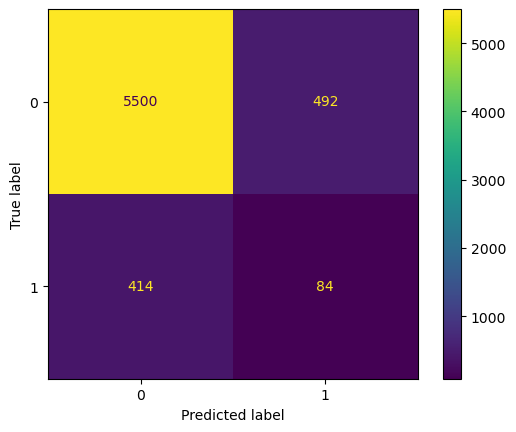

In [51]:
cm = confusion_matrix(y_test, results["y_pred"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [53]:
# Get the coefficients (weights) of the features
coefficients = model.coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by absolute coefficient values to see the importance
feature_importance_df['AbsoluteCoefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='AbsoluteCoefficient', ascending=False).drop('AbsoluteCoefficient', axis=1)

# Display the feature importance DataFrame
feature_importance_df

,Feature,Coefficient
1,gameId,-1.224561e-09
0,playId,-1.233048e-15
15,time_remaining,-1.032040e-15
11,weight_defense,-1.984165e-16
31,weight_offense,-1.305373e-16
8,dir_defense,-1.100337e-16
29,o_offense,-1.099144e-16
30,dir_offense,-1.079541e-16
7,o_defense,-1.059931e-16
10,height_in_inch_defense,-4.690934e-17
